# 7. 연결리스트 심화

## 1) 연결리스트 장점과 보완
- 삽입과 삭제가 유연함(빠르게 삽입 삭제 가능)
> but n번째의 노드를 앞에서부터 매번 찾아가야하기 때문에(getAt함수), 
**비효율적**일 수 있다! 따라서 새로운 매서드를 정의(insertAfter, popAfter)

- 위치를 pos로 수로 지정하지 말고 노드를 지정해 그 뒤에걸 삭제하거나 삽입하도록 하자!       


- 이때 또한 맨앞은 삭제할 수 없으므로 변형된 연결리스트를 사용
> 맨 앞에 **dummy node를 추가**한 형태로! (dummy node를 0번으로 지정)


In [1]:
# 변형된 연결리스트
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None) # head에 dummy node를 만듦
        self.tail = None
        self.head.next = self.tail

## 2) 변형 연산 정의
1. 길이 얻어내기
2. 리스트 순회
3. 특정 원소 참조
4. 삽입, 삭제
5. 두 리스트 합치기

-----
### 1. 리스트 순회

In [1]:
def traverse(self):
    result = []
    curr = self.head 
    while curr.next:    # next link가 살아있는 한 list에 담는
        curr = curr.next
        result.append(curr.data)  # node의 data를 꺼내 리스트에 넣음
    return result

----
### 2. k번째 원소 얻어내기

In [2]:
def getAt(self, pos):
    if pos<0 or pos>self.nodeCount:   # pos의 범위 지정
        return None
    
    i = 0    # 지난번에는 1부터 시작했음
    curr = self.head
    while i<pos:
        curr = curr.next    # pos번 만큼 next링크를 따라감
        i+=1
    return curr

---
### 3. 원소의 삽입
- prev가 가리키는 node 다음에 newNode를 삽입하고, 성공/실패에 따라 T/F를 리턴함
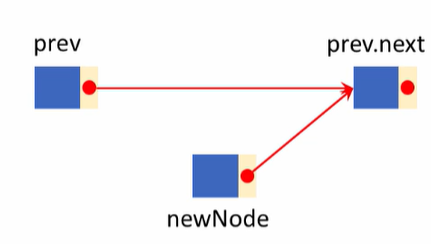

In [3]:
def insertAfter(self, prev, newNode):
    newNode.next = prev.next   # 현재 prev가 가리키고 있는 next
    
    if prev.next is None:       # tail일 때 
        self.tail = newNode
        
    prev.next = newNode
    self.nodeCount += 1
    return True

###  < insertAfter 매서드를 이용해 insertAt 매서드 구현 >

In [4]:
def insertAt(self, pos, newNode):
    if pos<1 or pos>self.nodeCount +1:  # 범위 벗어난 경우
        return False
    
    ##### prev를 먼저 지정하는 과정 
    if pos !=1 and pos == self.nodeCount +1:   # 리스트 맨 뒤 삽입
        prev = self.tail   # prev = tail로 지정(getAt이 아니라 바로 찾아감)
        
    else:
        prev = self.getAt(pos-1)   # prev를 pos-1로 지정
    
    ##### prev 지정 후 해당 prev으로 insertAfter 함수 적용!
    return self.insertAfter(prev, newNode)

----
### 4. 원소의 삭제
- prev의 다음 node를 삭제하고, 그 node의 data를 리턴

#### < 주의 사항 >       

**(1) prev가 마지막 node일 때 (prev.next == None)**

삭제할 next node가 없음
> return None     

**(2) 리스트 맨 끝의 node를 삭제할 때 (curr.next == None)**
> tail 조정 필요

-----
### 5. 연결 리스트 연산 (두 리스트 연결)

In [5]:
def concat(self, L):
    self.tail.next = L.head.next
    
    if L.tail:
        self.tail = L.tail
    self.nodeCount += L.nodeCount